In [1]:
import numpy as np
import torch
import pandas as pd
import json
from random import shuffle

In [2]:
whisper_embeds_path = '../data/whisper_embeds/whisper_embeds.pt'
tira_embed_path = '../data/whisper_embeds/tira-asr-orig-test.pt'

In [3]:
whisper_embeds = torch.load(whisper_embeds_path)
whisper_embeds.keys()

dict_keys(['fleurs-it_it-test.pt', 'fleurs-lt_lt-test.pt', 'fleurs-hu_hu-test.pt', 'fleurs-nb_no-test.pt', 'fleurs-fr_fr-test.pt', 'fleurs-tr_tr-test.pt', 'fleurs-ln_cd-test.pt', 'fleurs-az_az-test.pt', 'fleurs-uz_uz-test.pt', 'fleurs-kk_kz-test.pt', 'fleurs-ar_eg-test.pt', 'fleurs-km_kh-test.pt', 'fleurs-el_gr-test.pt', 'fleurs-te_in-test.pt', 'fleurs-sw_ke-test.pt', 'fleurs-hi_in-test.pt', 'fleurs-sk_sk-test.pt', 'fleurs-mk_mk-test.pt', 'fleurs-sn_zw-test.pt', 'fleurs-fi_fi-test.pt', 'fleurs-mr_in-test.pt', 'fleurs-ca_es-test.pt', 'fleurs-fa_ir-test.pt', 'fleurs-as_in-test.pt', 'fleurs-hy_am-test.pt', 'fleurs-ro_ro-test.pt', 'fleurs-lb_lu-test.pt', 'fleurs-mn_mn-test.pt', 'fleurs-oc_fr-test.pt', 'fleurs-bg_bg-test.pt', 'fleurs-et_ee-test.pt', 'fleurs-vi_vn-test.pt', 'fleurs-sd_in-test.pt', 'fleurs-ur_pk-test.pt', 'fleurs-ps_af-test.pt', 'fleurs-es_419-test.pt', 'fleurs-ne_np-test.pt', 'fleurs-lv_lv-test.pt', 'fleurs-bn_in-test.pt', 'fleurs-tg_tj-test.pt', 'fleurs-ka_ge-test.pt', 'fle

In [4]:
# taken from https://stackoverflow.com/questions/18424228/cosine-similarity-between-2-number-lists
cosine = lambda v1, v2: np.dot(v1, v2)/(np.linalg.norm(v1)*np.linalg.norm(v2))

In [5]:
tira_embeds = torch.load(tira_embed_path)#whisper_embeds['tira-asr-orig-test.pt']
tira_embeds.shape

torch.Size([1280])

In [6]:
whisper_embeds['tira']=tira_embeds
whisper_embeds.pop('tira-asr-orig-test.pt', None)

tensor([ 0.4284, -0.8002,  0.1050,  ..., -0.1635, -0.2039,  0.7403])

In [7]:
cos_sim = []
langs = list(whisper_embeds.keys())
shuffle(langs)
embeds = []
for lang in langs:
    cos_sim.append(cosine(whisper_embeds[lang], tira_embeds))
    embeds.append(whisper_embeds[lang])
cos_sim[:5], max(cos_sim)

([0.037798237, 0.03901282, 0.035198048, 0.03250674, 0.03159451], 0.9999999)

In [8]:
df=pd.DataFrame({'embeds_file': langs, 'cos_sim': cos_sim})
df.head()

,embeds_file,cos_sim
0,fleurs-mr_in-test.pt,0.037798
1,fleurs-tg_tj-test.pt,0.039013
2,fleurs-ne_np-test.pt,0.035198
3,fleurs-ru_ru-test.pt,0.032507
4,fleurs-te_in-test.pt,0.031595


In [9]:
lang_code = df['embeds_file'].apply(lambda s: s.replace('fleurs-','').replace('-test.pt',''))
df['lang_code']=lang_code
df.head()

,embeds_file,cos_sim,lang_code
0,fleurs-mr_in-test.pt,0.037798,mr_in
1,fleurs-tg_tj-test.pt,0.039013,tg_tj
2,fleurs-ne_np-test.pt,0.035198,ne_np
3,fleurs-ru_ru-test.pt,0.032507,ru_ru
4,fleurs-te_in-test.pt,0.031595,te_in


In [10]:
lang_code_path = '../meta/language_codes.json'
with open(lang_code_path) as f:
    lang_code_dict = json.load(f)
lang_code_dict['tira']='tira'
lang_code_dict

{'english': 'en_us',
 'german': 'de_de',
 'spanish': 'es_419',
 'russian': 'ru_ru',
 'korean': 'ko_kr',
 'french': 'fr_fr',
 'japanese': 'ja_jp',
 'portuguese': 'pt_br',
 'turkish': 'tr_tr',
 'polish': 'pl_pl',
 'catalan': 'ca_es',
 'dutch': 'nl_nl',
 'arabic': 'ar_eg',
 'swedish': 'sv_se',
 'italian': 'it_it',
 'indonesian': 'id_id',
 'hindi': 'hi_in',
 'finnish': 'fi_fi',
 'vietnamese': 'vi_vn',
 'hebrew': 'he_il',
 'ukrainian': 'uk_ua',
 'greek': 'el_gr',
 'malay': 'ms_my',
 'czech': 'cs_cz',
 'romanian': 'ro_ro',
 'danish': 'da_dk',
 'hungarian': 'hu_hu',
 'tamil': 'ta_in',
 'norwegian': 'nb_no',
 'thai': 'th_th',
 'urdu': 'ur_pk',
 'croatian': 'hr_hr',
 'bulgarian': 'bg_bg',
 'lithuanian': 'lt_lt',
 'maori': 'mi_nz',
 'malayalam': 'ml_in',
 'welsh': 'cy_gb',
 'slovak': 'sk_sk',
 'telugu': 'te_in',
 'persian': 'fa_ir',
 'latvian': 'lv_lv',
 'bengali': 'bn_in',
 'serbian': 'sr_rs',
 'azerbaijani': 'az_az',
 'slovenian': 'sl_si',
 'kannada': 'kn_in',
 'estonian': 'et_ee',
 'macedonia

In [11]:
code_to_lang = {v:k for k, v in lang_code_dict.items()}
lang_names = df['lang_code'].apply(lambda s: code_to_lang[s])
df['lang']=lang_names
df.head()

,embeds_file,cos_sim,lang_code,lang
0,fleurs-mr_in-test.pt,0.037798,mr_in,marathi
1,fleurs-tg_tj-test.pt,0.039013,tg_tj,tajik
2,fleurs-ne_np-test.pt,0.035198,ne_np,nepali
3,fleurs-ru_ru-test.pt,0.032507,ru_ru,russian
4,fleurs-te_in-test.pt,0.031595,te_in,telugu


In [12]:
df.sort_values('cos_sim', ascending=False)

,embeds_file,cos_sim,lang_code,lang
67,tira,1.000000,tira,tira
26,fleurs-mk_mk-test.pt,0.039587,mk_mk,macedonian
28,fleurs-gu_in-test.pt,0.039139,gu_in,gujarati
1,fleurs-tg_tj-test.pt,0.039013,tg_tj,tajik
0,fleurs-mr_in-test.pt,0.037798,mr_in,marathi
...,...,...,...,...
58,fleurs-de_de-test.pt,0.026803,de_de,german
37,fleurs-ro_ro-test.pt,0.025502,ro_ro,romanian
31,fleurs-jv_id-test.pt,0.023970,jv_id,javanese
13,fleurs-id_id-test.pt,0.023683,id_id,indonesian


In [13]:
lang_to_embeds_file = {}
add_pair = lambda r: lang_to_embeds_file.update({r['lang']:r['embeds_file']})
df.apply(add_pair, axis=1)
lang_to_embeds_file['tira']='tira'
lang_to_embeds_file

{'marathi': 'fleurs-mr_in-test.pt',
 'tajik': 'fleurs-tg_tj-test.pt',
 'nepali': 'fleurs-ne_np-test.pt',
 'russian': 'fleurs-ru_ru-test.pt',
 'telugu': 'fleurs-te_in-test.pt',
 'uzbek': 'fleurs-uz_uz-test.pt',
 'malayalam': 'fleurs-ml_in-test.pt',
 'bulgarian': 'fleurs-bg_bg-test.pt',
 'somali': 'fleurs-so_so-test.pt',
 'danish': 'fleurs-da_dk-test.pt',
 'polish': 'fleurs-pl_pl-test.pt',
 'french': 'fleurs-fr_fr-test.pt',
 'hindi': 'fleurs-hi_in-test.pt',
 'indonesian': 'fleurs-id_id-test.pt',
 'kazakh': 'fleurs-kk_kz-test.pt',
 'pashto': 'fleurs-ps_af-test.pt',
 'spanish': 'fleurs-es_419-test.pt',
 'finnish': 'fleurs-fi_fi-test.pt',
 'luxembourgish': 'fleurs-lb_lu-test.pt',
 'azerbaijani': 'fleurs-az_az-test.pt',
 'czech': 'fleurs-cs_cz-test.pt',
 'estonian': 'fleurs-et_ee-test.pt',
 'shona': 'fleurs-sn_zw-test.pt',
 'yoruba': 'fleurs-yo_ng-test.pt',
 'lithuanian': 'fleurs-lt_lt-test.pt',
 'turkish': 'fleurs-tr_tr-test.pt',
 'macedonian': 'fleurs-mk_mk-test.pt',
 'punjabi': 'fleurs-pa

In [14]:
def compare_langs(lang1, lang2):
    embed1 = whisper_embeds[lang_to_embeds_file[lang1]]
    embed2 = whisper_embeds[lang_to_embeds_file[lang2]]
    return cosine(embed1, embed2)

compare_langs('punjabi', 'tira')

0.02890823

In [15]:
from scipy.spatial import distance_matrix
from scipy.spatial.distance import cosine, pdist, squareform
import seaborn
import matplotlib.pyplot as plt

In [16]:
dist_mat=squareform(pdist(embeds,cosine))
dist_mat.shape

(80, 80)

In [17]:
dist_df=pd.DataFrame(dist_mat, index=lang_names, columns=lang_names)
dist_df.head()

lang_code,marathi,tajik,nepali,russian,telugu,uzbek,malayalam,bulgarian,somali,danish,...,portuguese,dutch,kannada,hausa,hebrew,maltese,sindhi,tamil,amharic,korean
lang_code,,,,,,,,,,,,,,,,,,,,,
marathi,0.000000,0.035656,0.017897,0.028827,0.007432,0.023059,0.008279,0.016706,0.010748,0.014196,...,0.014818,0.047911,0.023515,0.021360,0.013657,0.008581,0.011672,0.007618,0.023814,0.031582
tajik,0.035656,0.000000,0.056705,0.006617,0.023959,0.015913,0.031100,0.013394,0.045862,0.023400,...,0.071011,0.004622,0.100142,0.042214,0.033804,0.020650,0.049754,0.053220,0.007271,0.002463
nepali,0.017897,0.056705,0.000000,0.041193,0.022833,0.029361,0.020480,0.027652,0.019776,0.015375,...,0.010644,0.073987,0.032536,0.022715,0.014471,0.020978,0.011273,0.015302,0.042813,0.051505
russian,0.028827,0.006617,0.041193,0.000000,0.015526,0.005770,0.021829,0.003923,0.037597,0.010927,...,0.051696,0.013594,0.087052,0.025632,0.022844,0.016931,0.035687,0.042179,0.003345,0.003873
telugu,0.007432,0.023959,0.022833,0.015526,0.000000,0.011151,0.005358,0.007305,0.011497,0.007205,...,0.020159,0.033830,0.040684,0.016804,0.011031,0.005841,0.010161,0.012167,0.013133,0.019018


In [18]:
lang_names.tolist()

['marathi',
 'tajik',
 'nepali',
 'russian',
 'telugu',
 'uzbek',
 'malayalam',
 'bulgarian',
 'somali',
 'danish',
 'polish',
 'french',
 'hindi',
 'indonesian',
 'kazakh',
 'pashto',
 'spanish',
 'finnish',
 'luxembourgish',
 'azerbaijani',
 'czech',
 'estonian',
 'shona',
 'yoruba',
 'lithuanian',
 'turkish',
 'macedonian',
 'punjabi',
 'gujarati',
 'khmer',
 'ukrainian',
 'javanese',
 'persian',
 'malay',
 'welsh',
 'bosnian',
 'japanese',
 'romanian',
 'icelandic',
 'vietnamese',
 'slovak',
 'mongolian',
 'armenian',
 'catalan',
 'galician',
 'lao',
 'italian',
 'latvian',
 'hungarian',
 'thai',
 'georgian',
 'afrikaans',
 'assamese',
 'slovenian',
 'english',
 'occitan',
 'urdu',
 'belarusian',
 'german',
 'swahili',
 'serbian',
 'swedish',
 'lingala',
 'norwegian',
 'croatian',
 'greek',
 'bengali',
 'tira',
 'arabic',
 'maori',
 'portuguese',
 'dutch',
 'kannada',
 'hausa',
 'hebrew',
 'maltese',
 'sindhi',
 'tamil',
 'amharic',
 'korean']

In [19]:
dist_df['tira']

lang_code
marathi    0.962202
tajik      0.960987
nepali     0.964802
russian    0.967493
telugu     0.968405
             ...   
maltese    0.969172
sindhi     0.966329
tamil      0.966166
amharic    0.967660
korean     0.966662
Name: tira, Length: 80, dtype: float64

In [20]:
dist_df.to_csv('../data/whisper_embeds/dist_matrix.csv')

In [21]:
dist_df = dist_df.drop('tira', axis=1)
dist_df = dist_df.drop('tira', axis=0)

<Axes: xlabel='lang_code', ylabel='lang_code'>

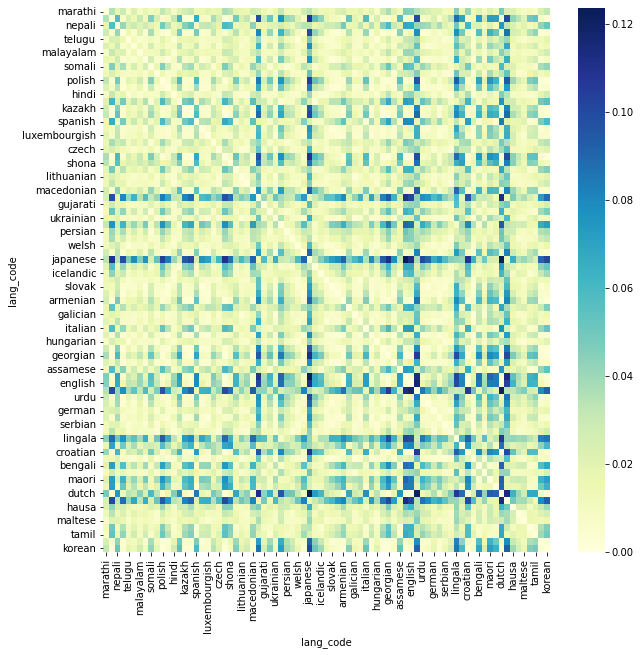

In [28]:
fig, ax = plt.subplots(figsize=(10,10))
seaborn.heatmap(dist_df, cmap='YlGnBu')